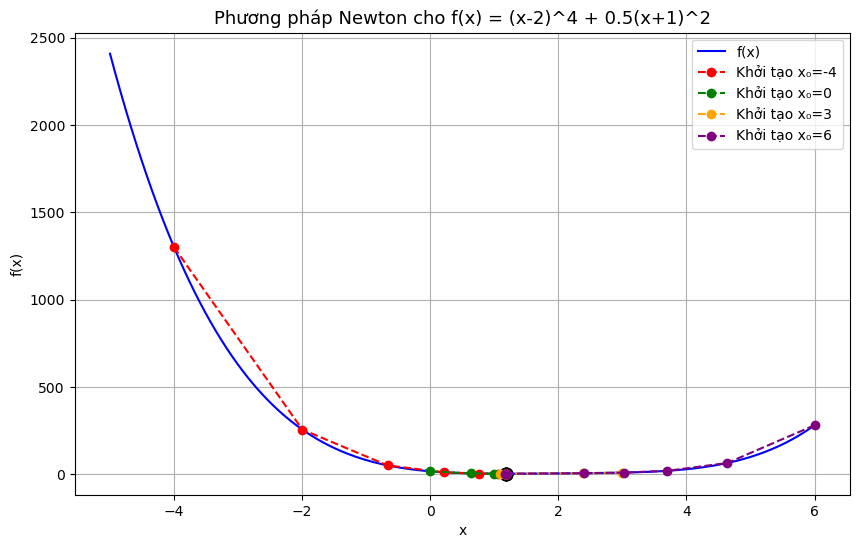

Điểm khởi tạo x₀ =   -4: hội tụ về x* = 1.182817, f(x*) = 2.828286
Điểm khởi tạo x₀ =    0: hội tụ về x* = 1.182817, f(x*) = 2.828286
Điểm khởi tạo x₀ =    3: hội tụ về x* = 1.182817, f(x*) = 2.828286
Điểm khởi tạo x₀ =    6: hội tụ về x* = 1.182817, f(x*) = 2.828286


In [10]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return (x - 2)**4 + 0.5*(x + 1)**2

def f_prime(x):
    return 4*(x - 2)**3 + (x + 1)

def f_double_prime(x):
    return 12*(x - 2)**2 + 1

def newton_method(x0, tol=1e-6, max_iter=100):
    x_values = [x0]
    for _ in range(max_iter):
        x_new = x_values[-1] - f_prime(x_values[-1]) / f_double_prime(x_values[-1])
        x_values.append(x_new)
        if abs(x_new - x_values[-2]) < tol:
            break
    return np.array(x_values)

starting_points = [-4, 0, 3, 6]
paths = [newton_method(x0) for x0 in starting_points]

x = np.linspace(-5, 6, 400)
y = f(x)

plt.figure(figsize=(10,6))
plt.plot(x, y, label='f(x)', color='blue')

colors = ['red', 'green', 'orange', 'purple']
for i, (path, c) in enumerate(zip(paths, colors)):
    plt.plot(path, f(path), 'o--', color=c, label=f'Khởi tạo x₀={starting_points[i]}')
    plt.scatter(path[-1], f(path[-1]), color=c, s=80, edgecolor='black')

plt.title('Phương pháp Newton cho f(x) = (x-2)^4 + 0.5(x+1)^2', fontsize=13)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

for x0, path in zip(starting_points, paths):
    print(f"Điểm khởi tạo x₀ = {x0:>4}: hội tụ về x* = {path[-1]:.6f}, f(x*) = {f(path[-1]):.6f}")


In [11]:
import numpy as np

# Dữ liệu
P = np.array([[1,0],[0,4]])
q = np.array([-1,4])

# a) Điểm và giá trị tối ưu
x_star = -np.linalg.inv(P) @ q
p_star = 0.5 * x_star.T @ P @ x_star + q.T @ x_star + 2.5



print('Điểm tối ưu x* =', x_star)
print('Giá trị tối ưu p* =', p_star)


# b) Chuyển về dạng least squares
A = np.diag([1, -2])
b = np.array([1, 2])  # tất cả > 0

# Kiểm tra đạo hàm (gradient) của hàm bình phương tối thiểu tại x*
grad_ls = A.T @ (A @ x_star - b)
print("Đạo hàm LS tại x* =", grad_ls)



Điểm tối ưu x* = [ 1. -1.]
Giá trị tối ưu p* = 0.0
Đạo hàm LS tại x* = [0. 0.]


In [14]:
def object_function(x):
    return 0.5 * x.T @ P @ x + q.T @ x + 2.5

def gradient(x):
    return P @ x + q

def gradient_descent(learning_rate, max_iterations, init_x):
    x = init_x
    x_values = [x]
    f_values = [object_function(x)]

    for i in range(max_iterations):
        x = x - learning_rate*gradient(x)
        x_values.append(x)
        f_values.append(object_function(x))
        print(f'lần lặp thứ {i+1}: x = {x_values[-1]} và f(x) = {f_values[-1]}')
    return x_values,f_values
    
lr1  = 0.4
lr2 = 0.6
max_iter = 100
x0 = np.array([-1, 2])

x_values1, f_values1 = gradient_descent(lr1, max_iter, x0)  
print('='*100)
x_values1, f_values2 = gradient_descent(lr2, max_iter, x0)  

lần lặp thứ 1: x = [-0.2 -2.8] và f(x) = 7.200000000000005
lần lặp thứ 2: x = [0.28 0.08] và f(x) = 2.5920000000000023
lần lặp thứ 3: x = [ 0.568 -1.648] và f(x) = 0.9331199999999997
lần lặp thứ 4: x = [ 0.7408 -0.6112] và f(x) = 0.3359232000000003
lần lặp thứ 5: x = [ 0.84448 -1.23328] và f(x) = 0.12093235200000008
lần lặp thứ 6: x = [ 0.906688 -0.860032] và f(x) = 0.0435356467200001
lần lặp thứ 7: x = [ 0.9440128 -1.0839808] và f(x) = 0.015672832819199733
lần lặp thứ 8: x = [ 0.96640768 -0.94961152] và f(x) = 0.005642219814911975
lần lặp thứ 9: x = [ 0.97984461 -1.03023309] và f(x) = 0.0020311991333685775
lần lặp thứ 10: x = [ 0.98790676 -0.98186015] và f(x) = 0.0007312316880132563
lần lặp thứ 11: x = [ 0.99274406 -1.01088391] và f(x) = 0.0002632434076845769
lần lặp thứ 12: x = [ 0.99564644 -0.99346965] và f(x) = 9.476762676685624e-05
lần lặp thứ 13: x = [ 0.99738786 -1.00391821] và f(x) = 3.411634563610377e-05
lần lặp thứ 14: x = [ 0.99843272 -0.99764908] và f(x) = 1.228188442903288

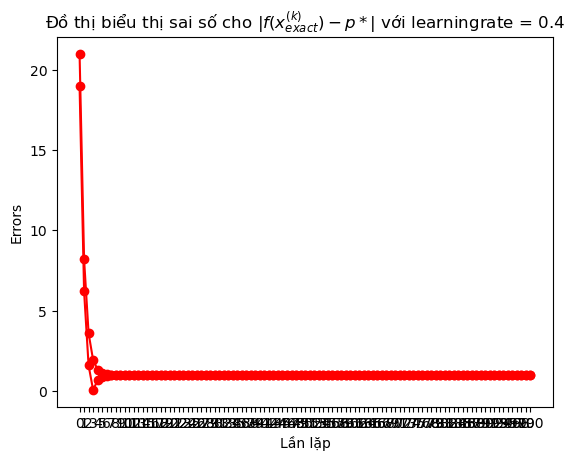

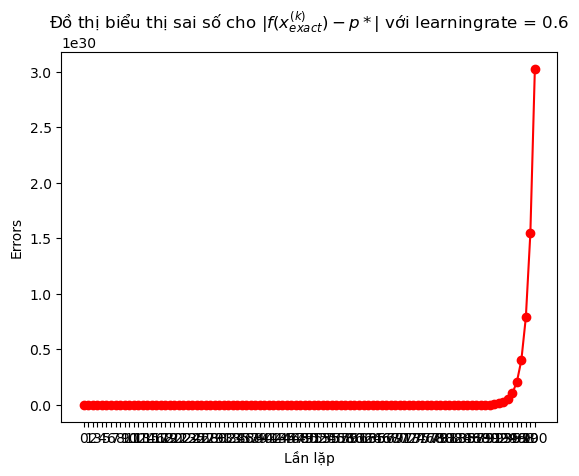

In [15]:
errors1 = [abs(f - x_star) for f in f_values1]
errors2 = [abs(f - p_star) for f in f_values2]
plt.title('Đồ thị biểu thị sai số cho $|f(x_{exact}^{(k)}) - p*|$ với learningrate = 0.4')
plt.plot(range(max_iter + 1), errors1, c='r', marker='o')
plt.xticks(range(max_iter + 1))
plt.xlabel('Lần lặp')
plt.ylabel('Errors')
plt.show()


plt.title('Đồ thị biểu thị sai số cho $|f(x_{exact}^{(k)}) - p*|$ với learningrate = 0.6')
plt.plot(range(max_iter + 1), errors2, c='r', marker='o')
plt.xticks(range(max_iter + 1))
plt.xlabel('Lần lặp')

plt.ylabel('Errors')
plt.show()

In [16]:
import numpy as np

# ======================
# DỮ LIỆU BÀI TOÁN
# ======================
P = np.array([[1., 0.],
              [0., 4.]])        # ma trận P (giống Câu 1)
q = np.array([-1., 4.])         # vector q (giống Câu 1)
c = 2.5                         # hằng số 5/2

# Ràng buộc Ux = w
U = np.array([[2., 1.],
              [-2., 4.]])       # ma trận U
w = np.array([2., 2.])          # vector w

# ======================
# a) VIẾT HỆ KKT
# KKT:
# [ P   U^T ] [ x ] = [ -q ]
# [ U    0  ] [ v ]   [  w ]
# ======================

K = np.block([
    [P, U.T],
    [U, np.zeros((2, 2))]
])
rhs = np.hstack([-q, w])

# ======================
#  GIẢI HỆ PHƯƠNG TRÌNH KKT
# ======================
sol = np.linalg.solve(K, rhs)
x_star = sol[:2]   # nghiệm tối ưu x*
v_star = sol[2:]   # nghiệm đối ngẫu v*

# ======================
#  TÍNH GIÁ TRỊ TỐI ƯU
# ======================
p_star = 0.5 * x_star.T @ P @ x_star + q.T @ x_star + c

# ======================
#  KIỂM TRA ĐIỀU KIỆN KKT
# ======================
grad_check = P @ x_star + q + U.T @ v_star     # Stationarity
cons_check = U @ x_star - w                    # Primal feasibility

# ======================
# IN KẾT QUẢ
# ======================
print("=== KẾT QUẢ BÀI TOÁN CÓ RÀNG BUỘC (CÂU 3) ===")
print("Điểm tối ưu x* =", x_star)
print("Bộ nhân Lagrange v* =", v_star)
print("Giá trị tối ưu p* =", p_star)

print("\n--- KIỂM TRA ĐIỀU KIỆN KKT ---")
print("P x* + q + U^T v* =", grad_check)
print("U x* - w =", cons_check)


=== KẾT QUẢ BÀI TOÁN CÓ RÀNG BUỘC (CÂU 3) ===
Điểm tối ưu x* = [0.6 0.8]
Bộ nhân Lagrange v* = [-1.28 -1.48]
Giá trị tối ưu p* = 6.5600000000000005

--- KIỂM TRA ĐIỀU KIỆN KKT ---
P x* + q + U^T v* = [-1.11022302e-16  0.00000000e+00]
U x* - w = [0. 0.]
